<a href="https://colab.research.google.com/github/ai-dolaeva/networks_project/blob/main/NetworksProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание проекта по направлению "Прикладные технологии анализа и моделирования социальных сетей"**

**---**

> **Первая часть:**

1. Необходимо выбрать социальный граф
2. Построить график распределения степеней вершин
3. Для неориентированного графа посчитать одну из рассмотренных мер центральности для узлов, для ориентированного — PageRank (можно пользоваться библиотекой networkx или любой другой).
4. Выбрать 1 меру центральности из не рассмотренных на лекции и написать свою реализацию.
5. Визуализировать социальный граф, на графе выделить несколько узлов, меры центральности для которых наибольшие. Для каждой меры -- отдельная визуализация.
6. Интерпретировать результаты.

> **Вторая часть:**

1. На выбранном для прошлой части задания графе применить два алгоритма выделения сообществ на выбор.
2. Сравнить результаты кластеризации с помощью модулярности, выбрать наилучшую кластеризацию.
3. Визуализировать выбранную кластеризацию, выделить в ней узлы, которые имели высокие значения любой из мер центральности из прошлого задания.
4. Ответить на вопрос, какое положение занимают узлы с высокими значениями мер центральности в сообществах
5. Необходимо промоделировать распространение эпидемии с помощью модели на выбранном графе, начиная с узлов с высокими значениями любой из мер центральности и с узлов с низкими значениями. Сравнить результат.

In [ ]:
pip install EoN

     |████████████████████████████████| 113 kB 7.4 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120819 sha256=65e7572eaf98ee47d9c21dd357610ba40fe8c8c8940d793b641c2c0dd5f52b69
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [ ]:
# модули:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.label_propagation import asyn_lpa_communities
import networkx.algorithms.community.quality as quality
import networkx.algorithms.community as nx_comm
import matplotlib.colors as colors
import EoN
from community import community_louvain as louvain
from collections import defaultdict
import numpy as np
import scipy
import random

# Описание выбранного социального графа

Данные взяты из сайта https://snap.stanford.edu/data/

LiveJournal social network - https://snap.stanford.edu/data/soc-LiveJournal1.html

---

Исходный файл содержит:

Узлов -	4847571

Ребер -	68993773

---

Сокращено до:

Узлов -	9193

Ребер -	9905

В файле: liveJournalGraph.adjlist

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/'networks'/

/content/drive/MyDrive/networks


In [ ]:
path = 'liveJournalGraph.adjlist'
G = nx.read_adjlist(path)

# График распределения степеней вершин

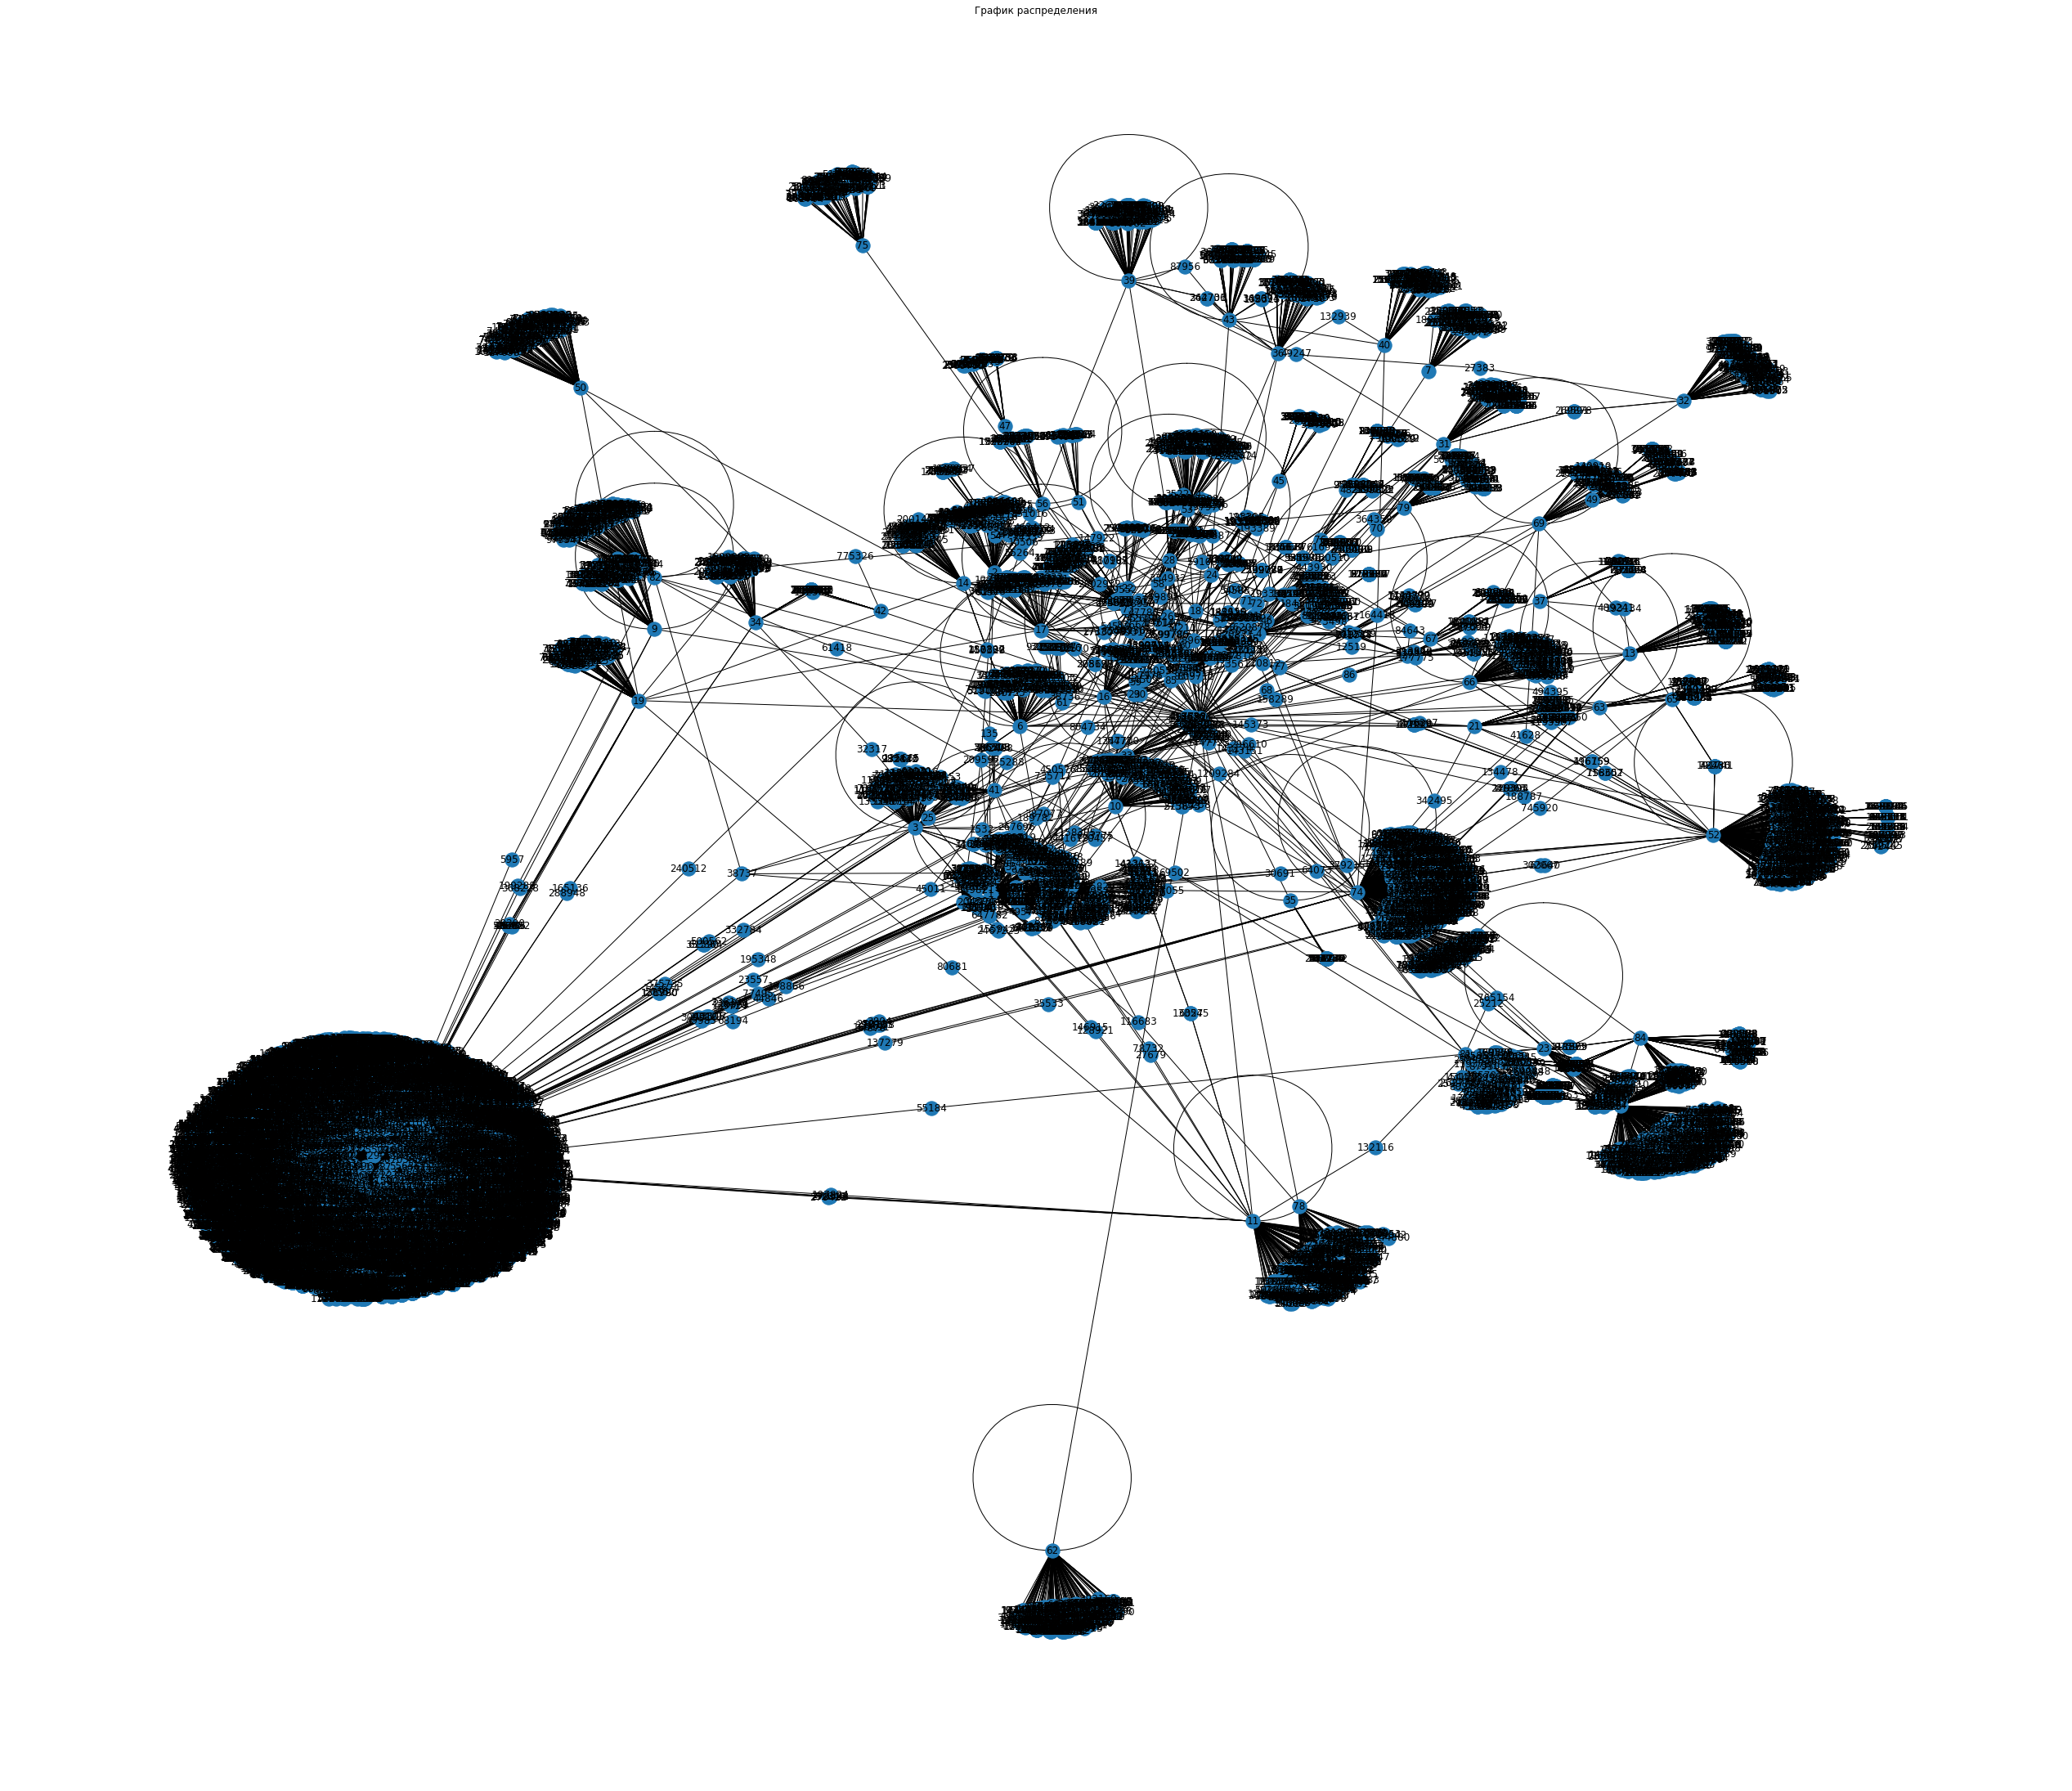

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(35, 30))
nx.draw(G, with_labels=True)
plt.title('График распределения')
plt.savefig('График_распределения.png')
plt.show()

# Расчёт меры центральности для узлов (готовая реализация)

In [ ]:
# Степень близости
# centrality = nx.closeness_centrality(G)
# centrality

In [ ]:
# PageRank algorithm
centrality=nx.pagerank(G,alpha=0.9)
centrality

{0: 0.003462589099467638,
 1: 0.007800298515438968,
 2: 0.004822402726640688,
 3: 0.004208054824851229,
 4: 0.002850204948727518,
 5: 0.003482882059556961,
 6: 0.003914272451717069,
 7: 0.0025646740413458598,
 8: 0.0010359930612333567,
 9: 0.0034463407574412052,
 10: 0.004305422787829502,
 11: 0.008530745087733802,
 12: 0.0023982152625590634,
 13: 0.0034941102729902328,
 14: 0.002341838369408315,
 15: 0.0007715698504472483,
 16: 0.0017799858860636545,
 17: 0.002612843807747553,
 18: 0.0008627682209473252,
 19: 0.0038783077691946226,
 20: 0.0025175235491868087,
 21: 0.0018483912738075313,
 22: 0.0006220610608949179,
 23: 0.0019650602632935196,
 24: 0.0011746961412490871,
 25: 0.00031460198980466474,
 26: 0.00392281551684815,
 27: 0.0011061399368422192,
 28: 0.0018725556829186523,
 29: 0.0008367722706897779,
 30: 0.0006673910734891288,
 31: 0.003150083734665273,
 32: 0.004645200871829898,
 33: 0.001408450314995875,
 34: 0.002994800279649012,
 35: 0.0004778511804209751,
 36: 0.00276079865

In [ ]:
# отсортированные меры центральности для узлов в порядке убывания значений мер

sorted_tuples = sorted(centrality.items(), key=lambda item: item[1], reverse = True)

# Первые 100 самых "централизованных" вершин
centr_nodes = []
for k, v in sorted_tuples[:100]:
    centr_nodes.append(k)

print("Первые 100 самых \"централизованных\" вершин", centr_nodes)

Первые 100 самых "централизованных" вершин [87, 74, 52, 64, 11, 1, 62, 82, 50, 81, 2, 32, 53, 10, 84, 3, 66, 75, 26, 6, 19, 39, 78, 13, 5, 0, 9, 31, 34, 4, 40, 36, 69, 73, 17, 7, 20, 12, 43, 14, 79, 23, 49, 28, 21, 65, 44, 16, 38, 33, 83, 47, 45, 63, 24, 27, 41, 58, 8, 70, 67, 48, 37, 18, 56, 29, 15, 51, 30, 42, 85, 72, 22, 55, 76, 80, 61, 54, 35, 57, 59, 25, 86, 46, 192147, 71, 38737, 146144, 267696, 192150, 593170, 60, 198866, 210812, 83664, 41628, 477807, 143151, 387077, 244736]


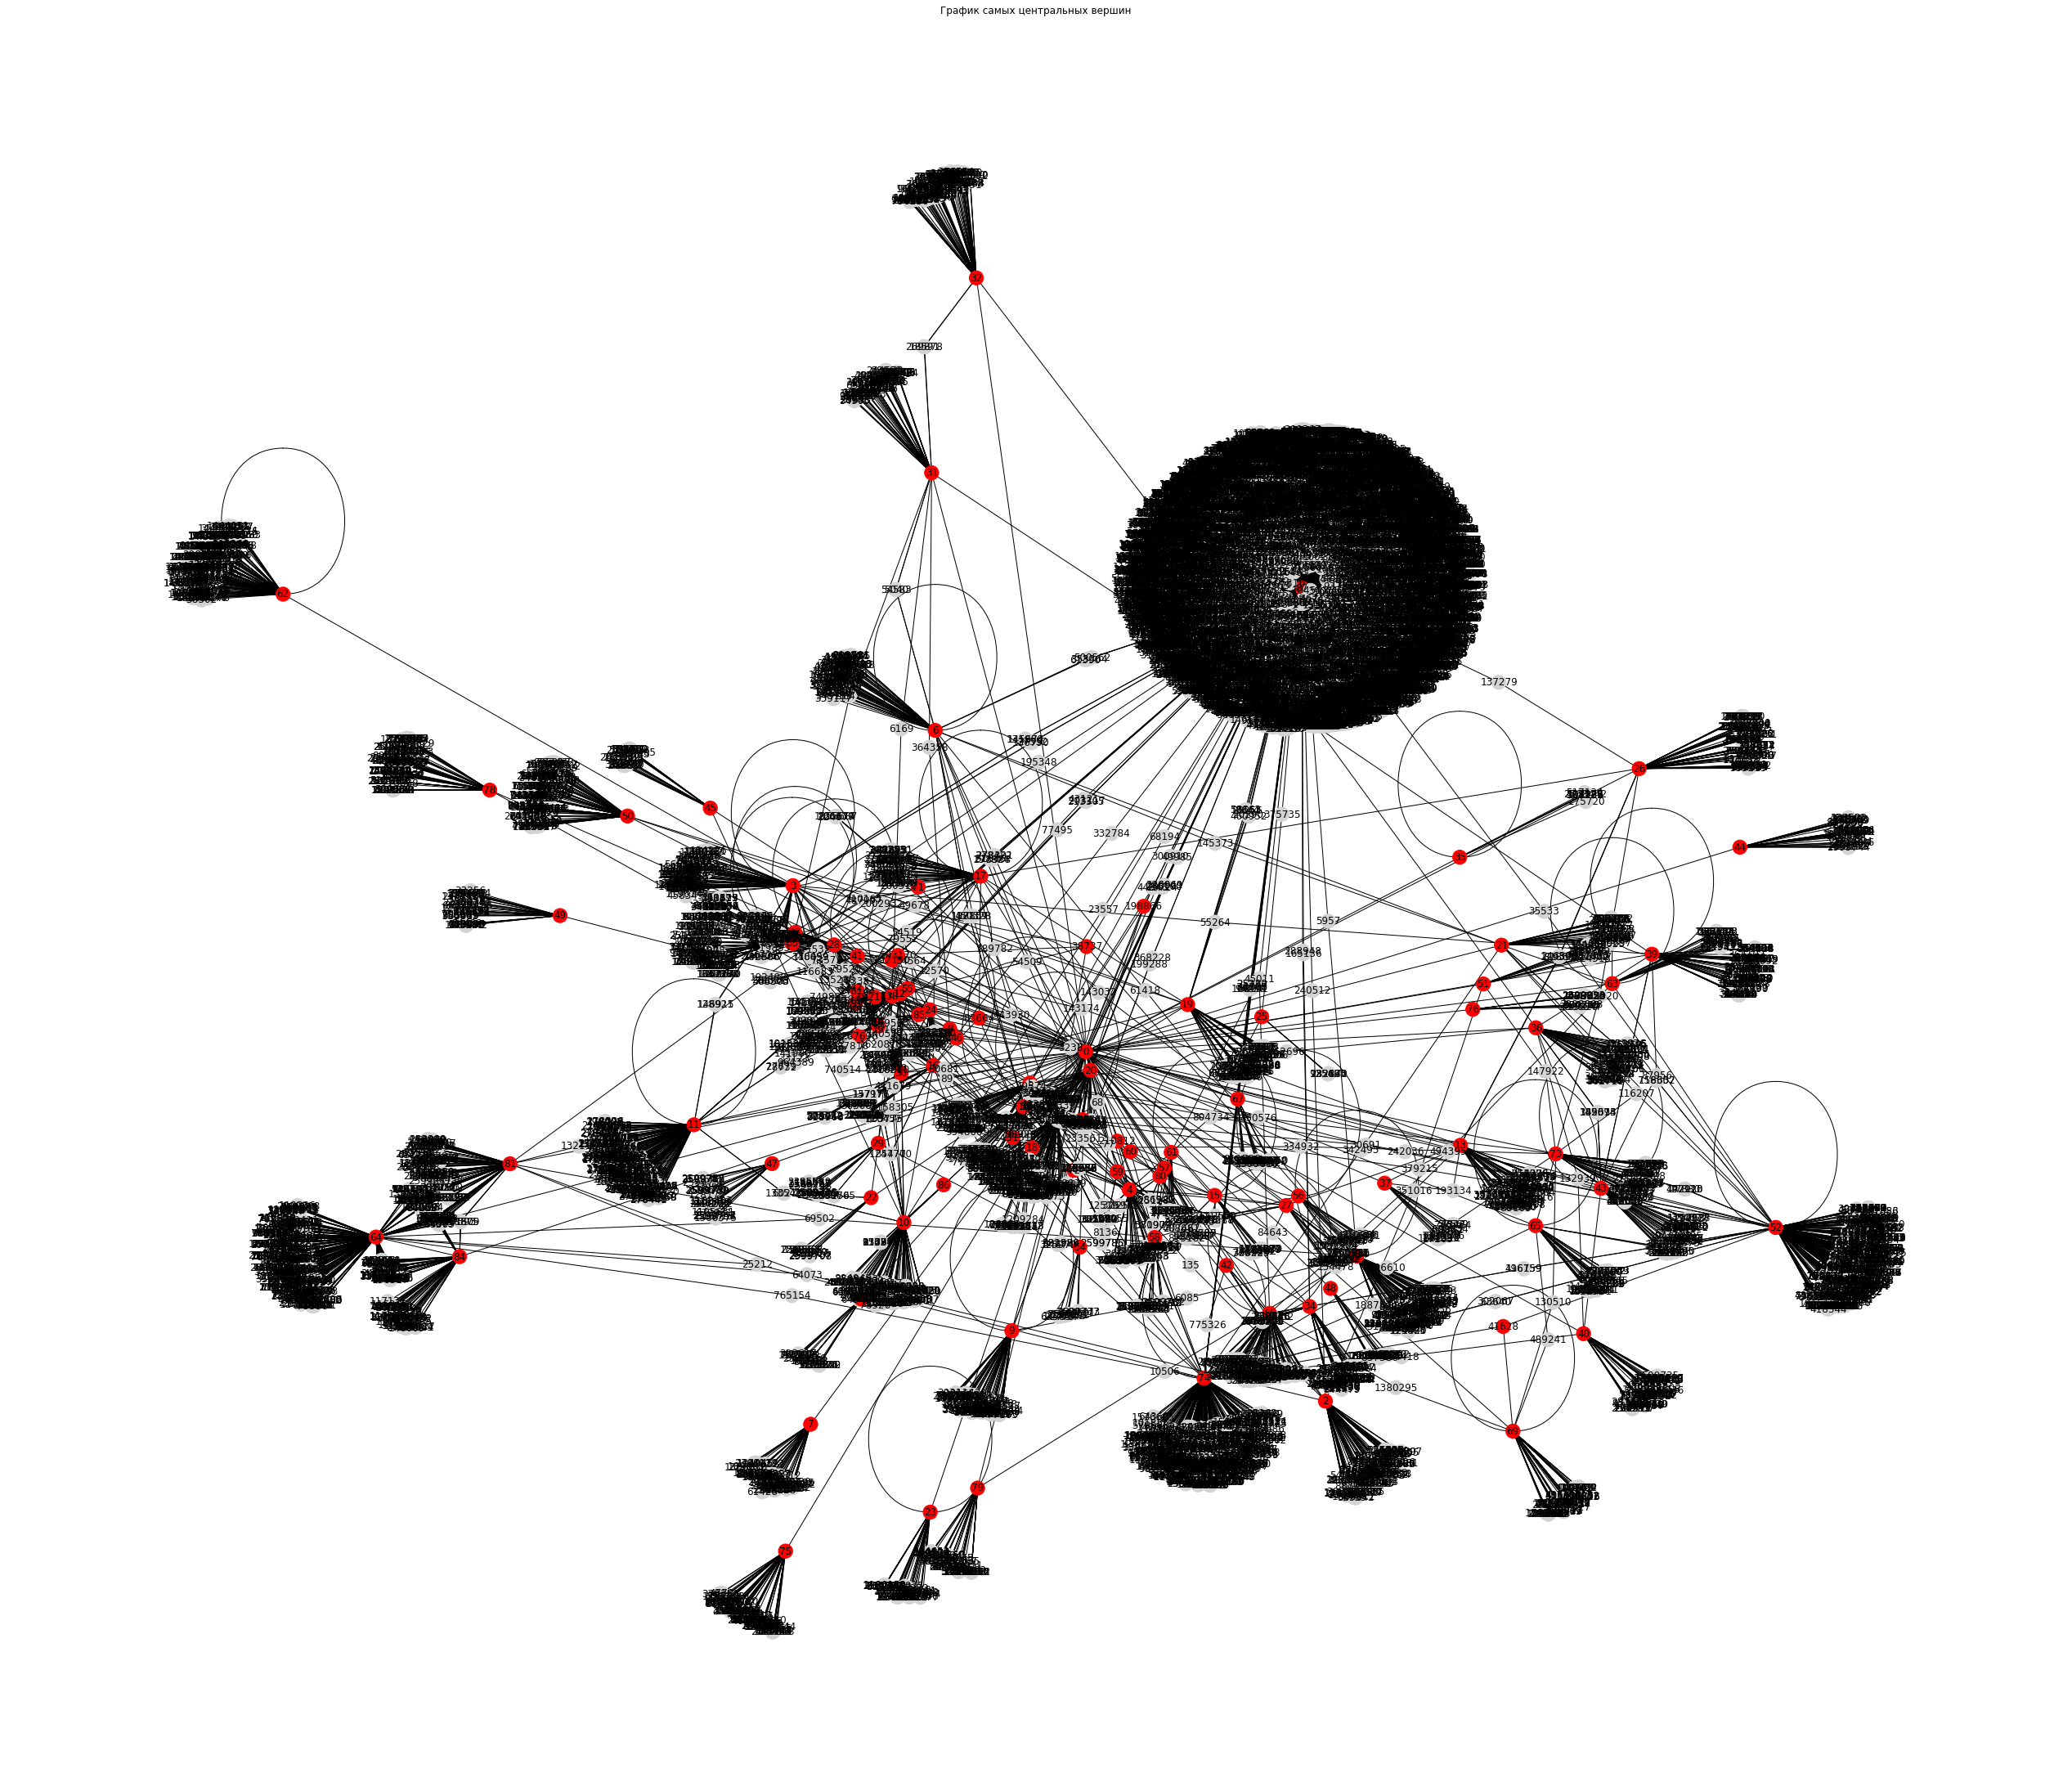

In [ ]:
plt.figure(figsize=(35, 30))
node_colors = ['red' if node in centr_nodes else 'lightgray' for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)
plt.title('График самых центральных вершин')
plt.savefig('График_центральных_вершин_pagerank.png')
plt.show()

In [ ]:
rev_centr_nodes = []
for k, v in sorted_tuples[-100:]:
    rev_centr_nodes.append(k)
print("Первые 100 самых \"нецентрализованных\" вершин", rev_centr_nodes)

Первые 100 самых "нецентрализованных" вершин [87, 74, 52, 64, 11, 1, 62, 82, 50, 81, 2, 32, 53, 10, 84, 3, 66, 75, 26, 6, 19, 39, 78, 13, 5, 0, 9, 31, 34, 4, 40, 36, 69, 73, 17, 7, 20, 12, 43, 14, 79, 23, 49, 28, 21, 65, 44, 16, 38, 33, 83, 47, 45, 63, 24, 27, 41, 58, 8, 70, 67, 48, 37, 18, 56, 29, 15, 51, 30, 42, 85, 72, 22, 55, 76, 80, 61, 54, 35, 57, 59, 25, 86, 46, 192147, 71, 38737, 146144, 267696, 192150, 593170, 60, 198866, 210812, 83664, 41628, 477807, 143151, 387077, 244736]


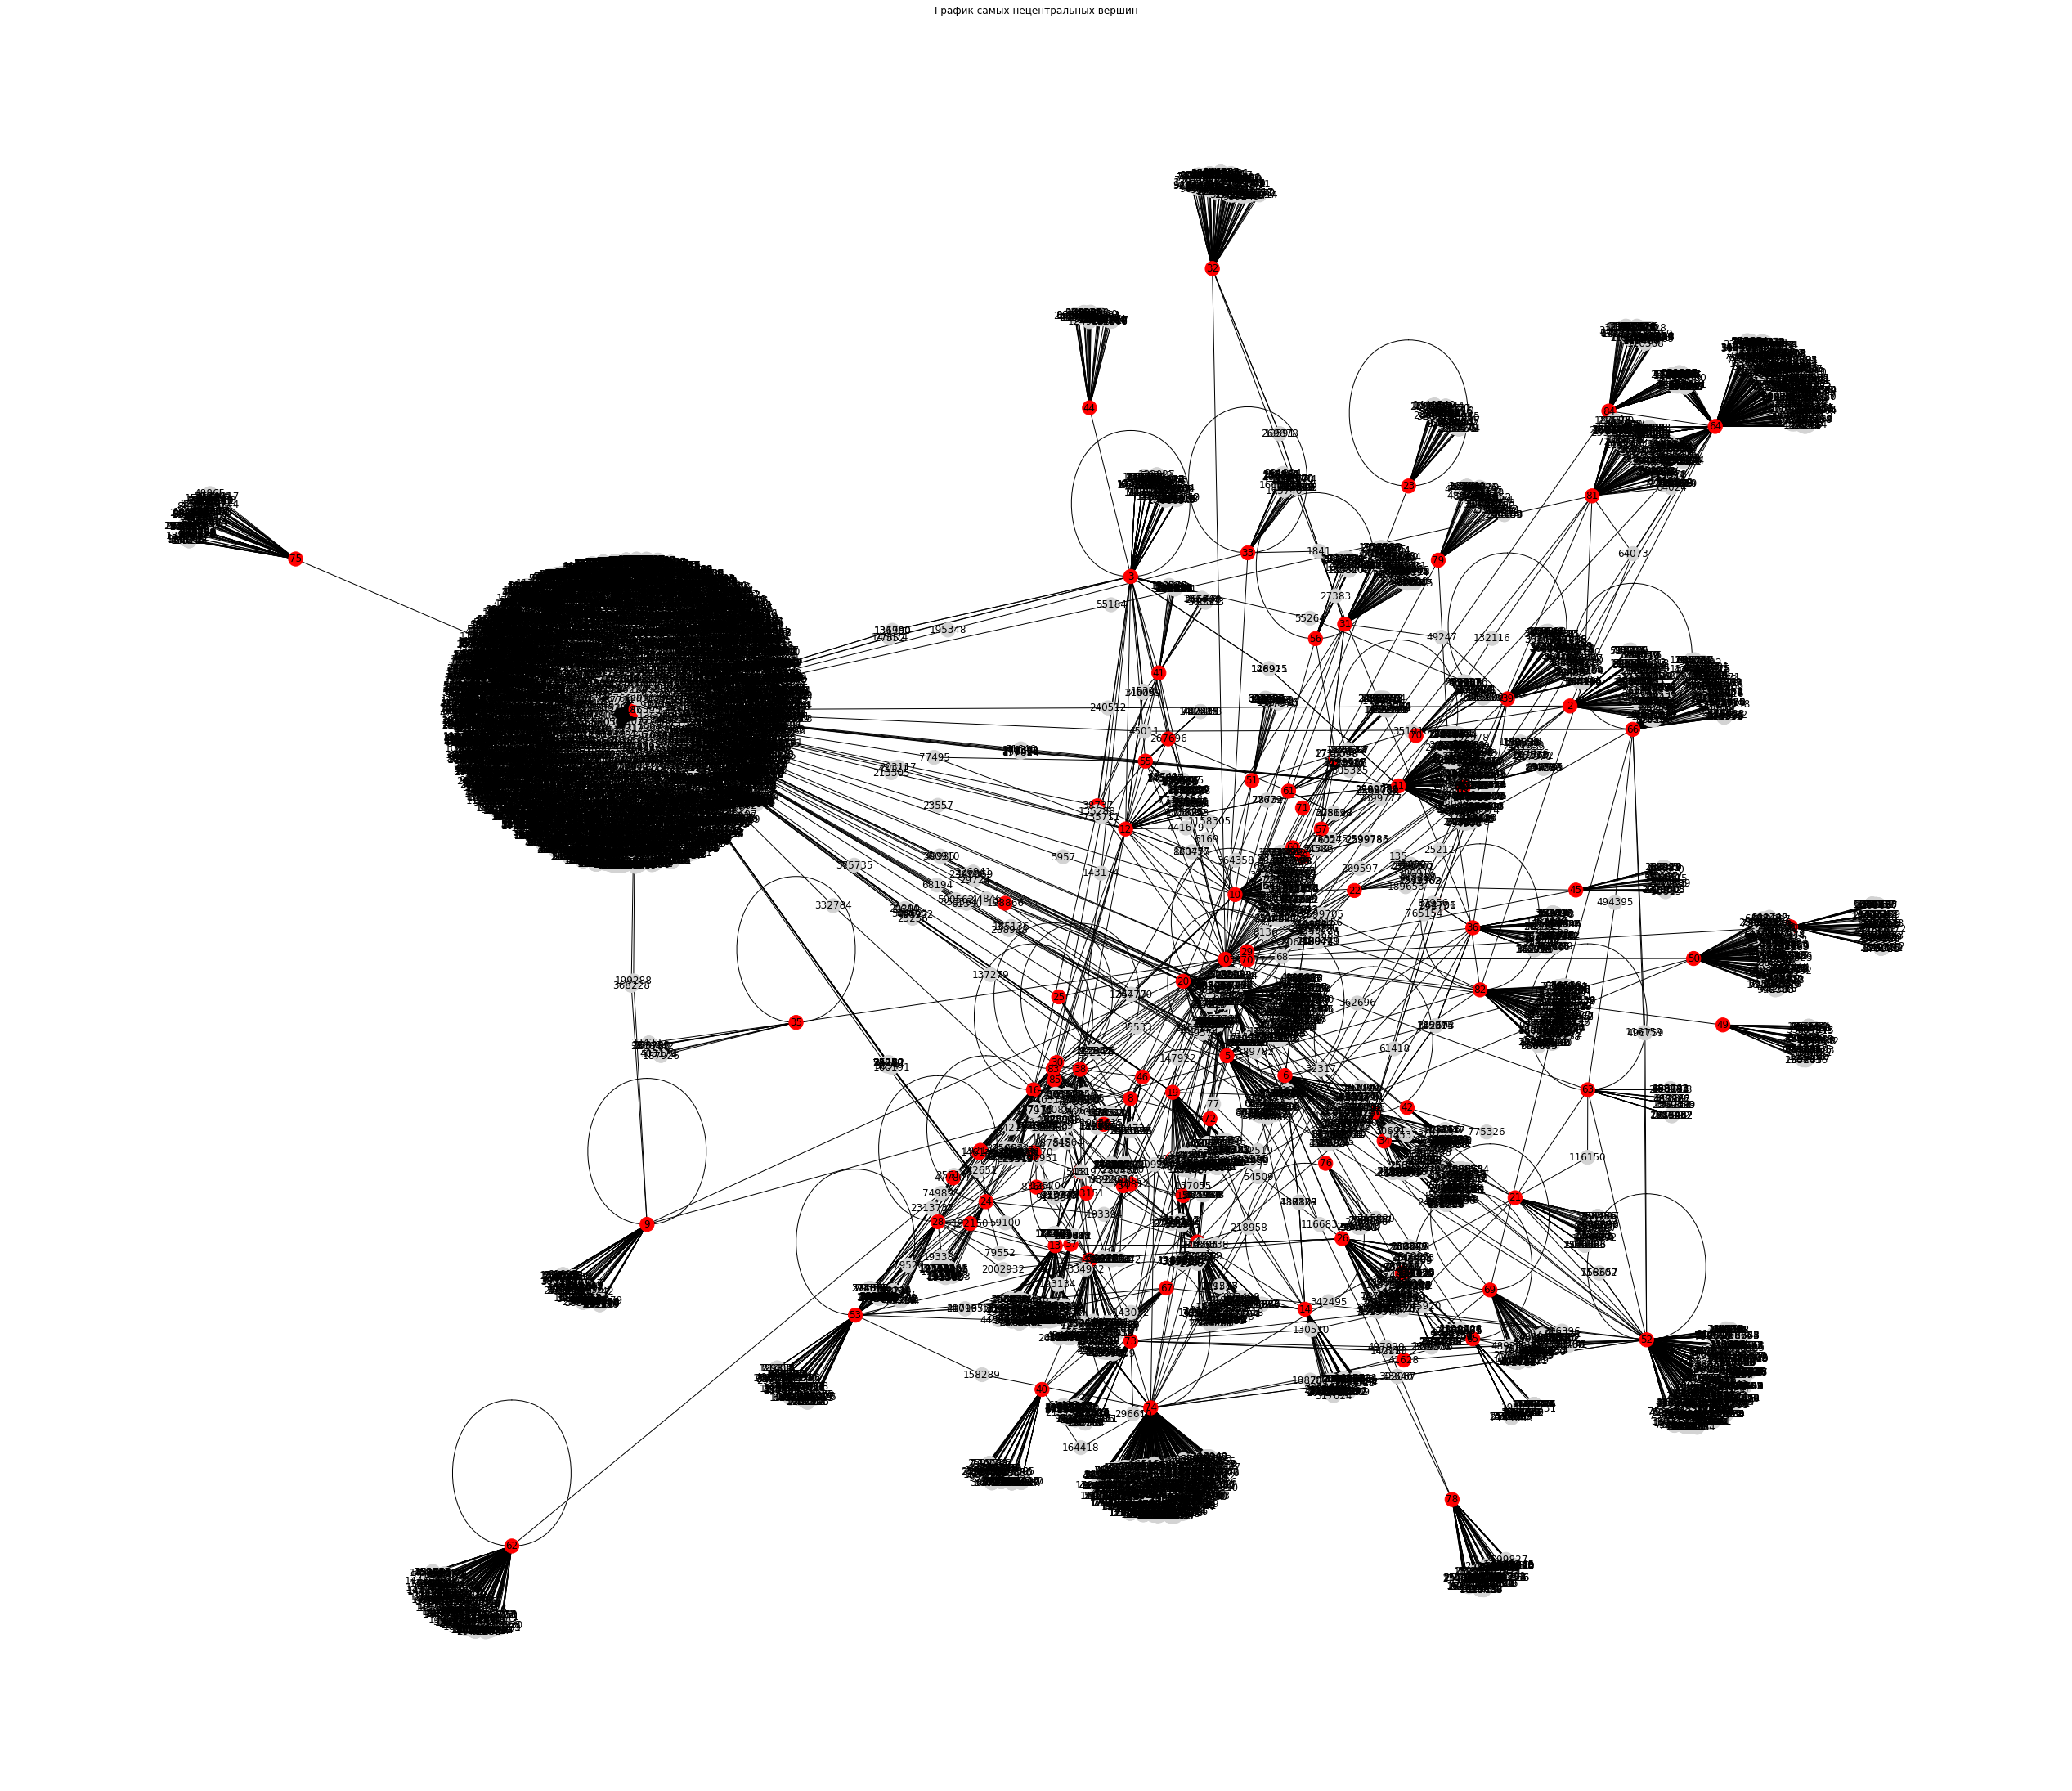

In [ ]:
plt.figure(figsize=(35, 30))
node_colors = ['red' if node in centr_nodes else 'lightgray' for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)
plt.title('График самых нецентральных вершин')
plt.savefig('График_нецентральных_вершин_pagerank.png')
plt.show()

# Расчёт меры центральности для узлов (своя реализация)

In [ ]:
# реализация katz

def katz(G, alpha=0.1, beta=1.0):

    if len(G) == 0:
        return {}
    try:
        nodelist = beta.keys()
        b = np.array(list(beta.values()), dtype=float)
    except:
        nodelist = list(G)
        try:
            b = np.ones((len(nodelist), 1)) * float(beta)
        except:
            print('oops')

    A = nx.adjacency_matrix(G, nodelist=nodelist, weight=None).todense().T
    n = A.shape[0]
    centrality = np.linalg.solve(np.eye(n, n) - (alpha * A), b)
    norm = np.sign(sum(centrality)) * np.linalg.norm(centrality)
    centrality = dict(zip(nodelist, map(float, centrality / norm)))
    return centrality

In [ ]:
centrality = katz(G)
centrality

{'0': 0.1348480286244685,
 '1': -0.023051324678355994,
 '2': 0.1637618006932074,
 '3': 0.14565169642074968,
 '4': 0.14787555722599405,
 '5': 0.029813267830944193,
 '6': 0.19723182875540698,
 '7': 0.017812890022077203,
 '8': 0.007034426313651249,
 '9': 0.032806953562377894,
 '10': -0.4443956236939175,
 '11': 0.011245936883445846,
 '12': -0.15088584854934287,
 '13': 0.06591014934826951,
 '14': 0.0962311370840538,
 '15': 0.05942827053316217,
 '16': -0.14570818348773587,
 '17': 0.04743907124957849,
 '18': -0.0025369543921408676,
 '19': 0.00332150856328187,
 '20': 0.007381238084385007,
 '21': 0.0537619965404387,
 '22': 0.011521838557468826,
 '23': 0.01882931270158449,
 '24': -0.005267203984328733,
 '25': 0.014726550437929422,
 '26': 0.06325805741333769,
 '27': 0.0603924200729724,
 '28': 0.011344386118714765,
 '29': -0.014206846617861221,
 '30': -0.09238573281519326,
 '31': 0.042082303982049346,
 '32': 0.08622547803733265,
 '33': 0.01780768522729821,
 '34': 0.0328910853992536,
 '35': 0.01480

In [ ]:
# отсортированные меры центральности для узлов в порядке убывания значений мер

sorted_tuples = sorted(centrality.items(), key=lambda item: item[1], reverse = True)

# Первые 100 самых "централизованных" вершин
centr_nodes = []
for k, v in sorted_tuples[:100]:
    centr_nodes.append(k)

print("Первые 100 самых \"централизованных\" вершин", centr_nodes)

Первые 100 самых "централизованных" вершин ['6', '39', '2', '4', '3', '0', '66', '36', '14', '32', '53', '43', '13', '26', '27', '15', '21', '17', '72', '80', '31', '41', '40', '244736', '362701', '54509', '34', '9', '55264', '75', '5', '450328', '188807', '117139', '218958', '69', '77', '58', '84', '63', '271744', '1612559', '67', '78', '143174', '87956', '145373', '325966', '42697', '214637', '19079', '465373', '54583', '5040', '37', '73', '49247', '59', '65', '57', '219517', '191288', '207467', '488681', '353364', '61390', '500562', '189782', '42', '60', '56', '1195332', '1688618', '531503', '515174', '504150', '519008', '242743', '318683', '4204865', '35776', '127434', '181286', '843990', '136842', '197733', '198063', '98', '8795', '87178', '480902', '88672', '128733', '61401', '145388', '154594', '83810', '339117', '18286', '38750']


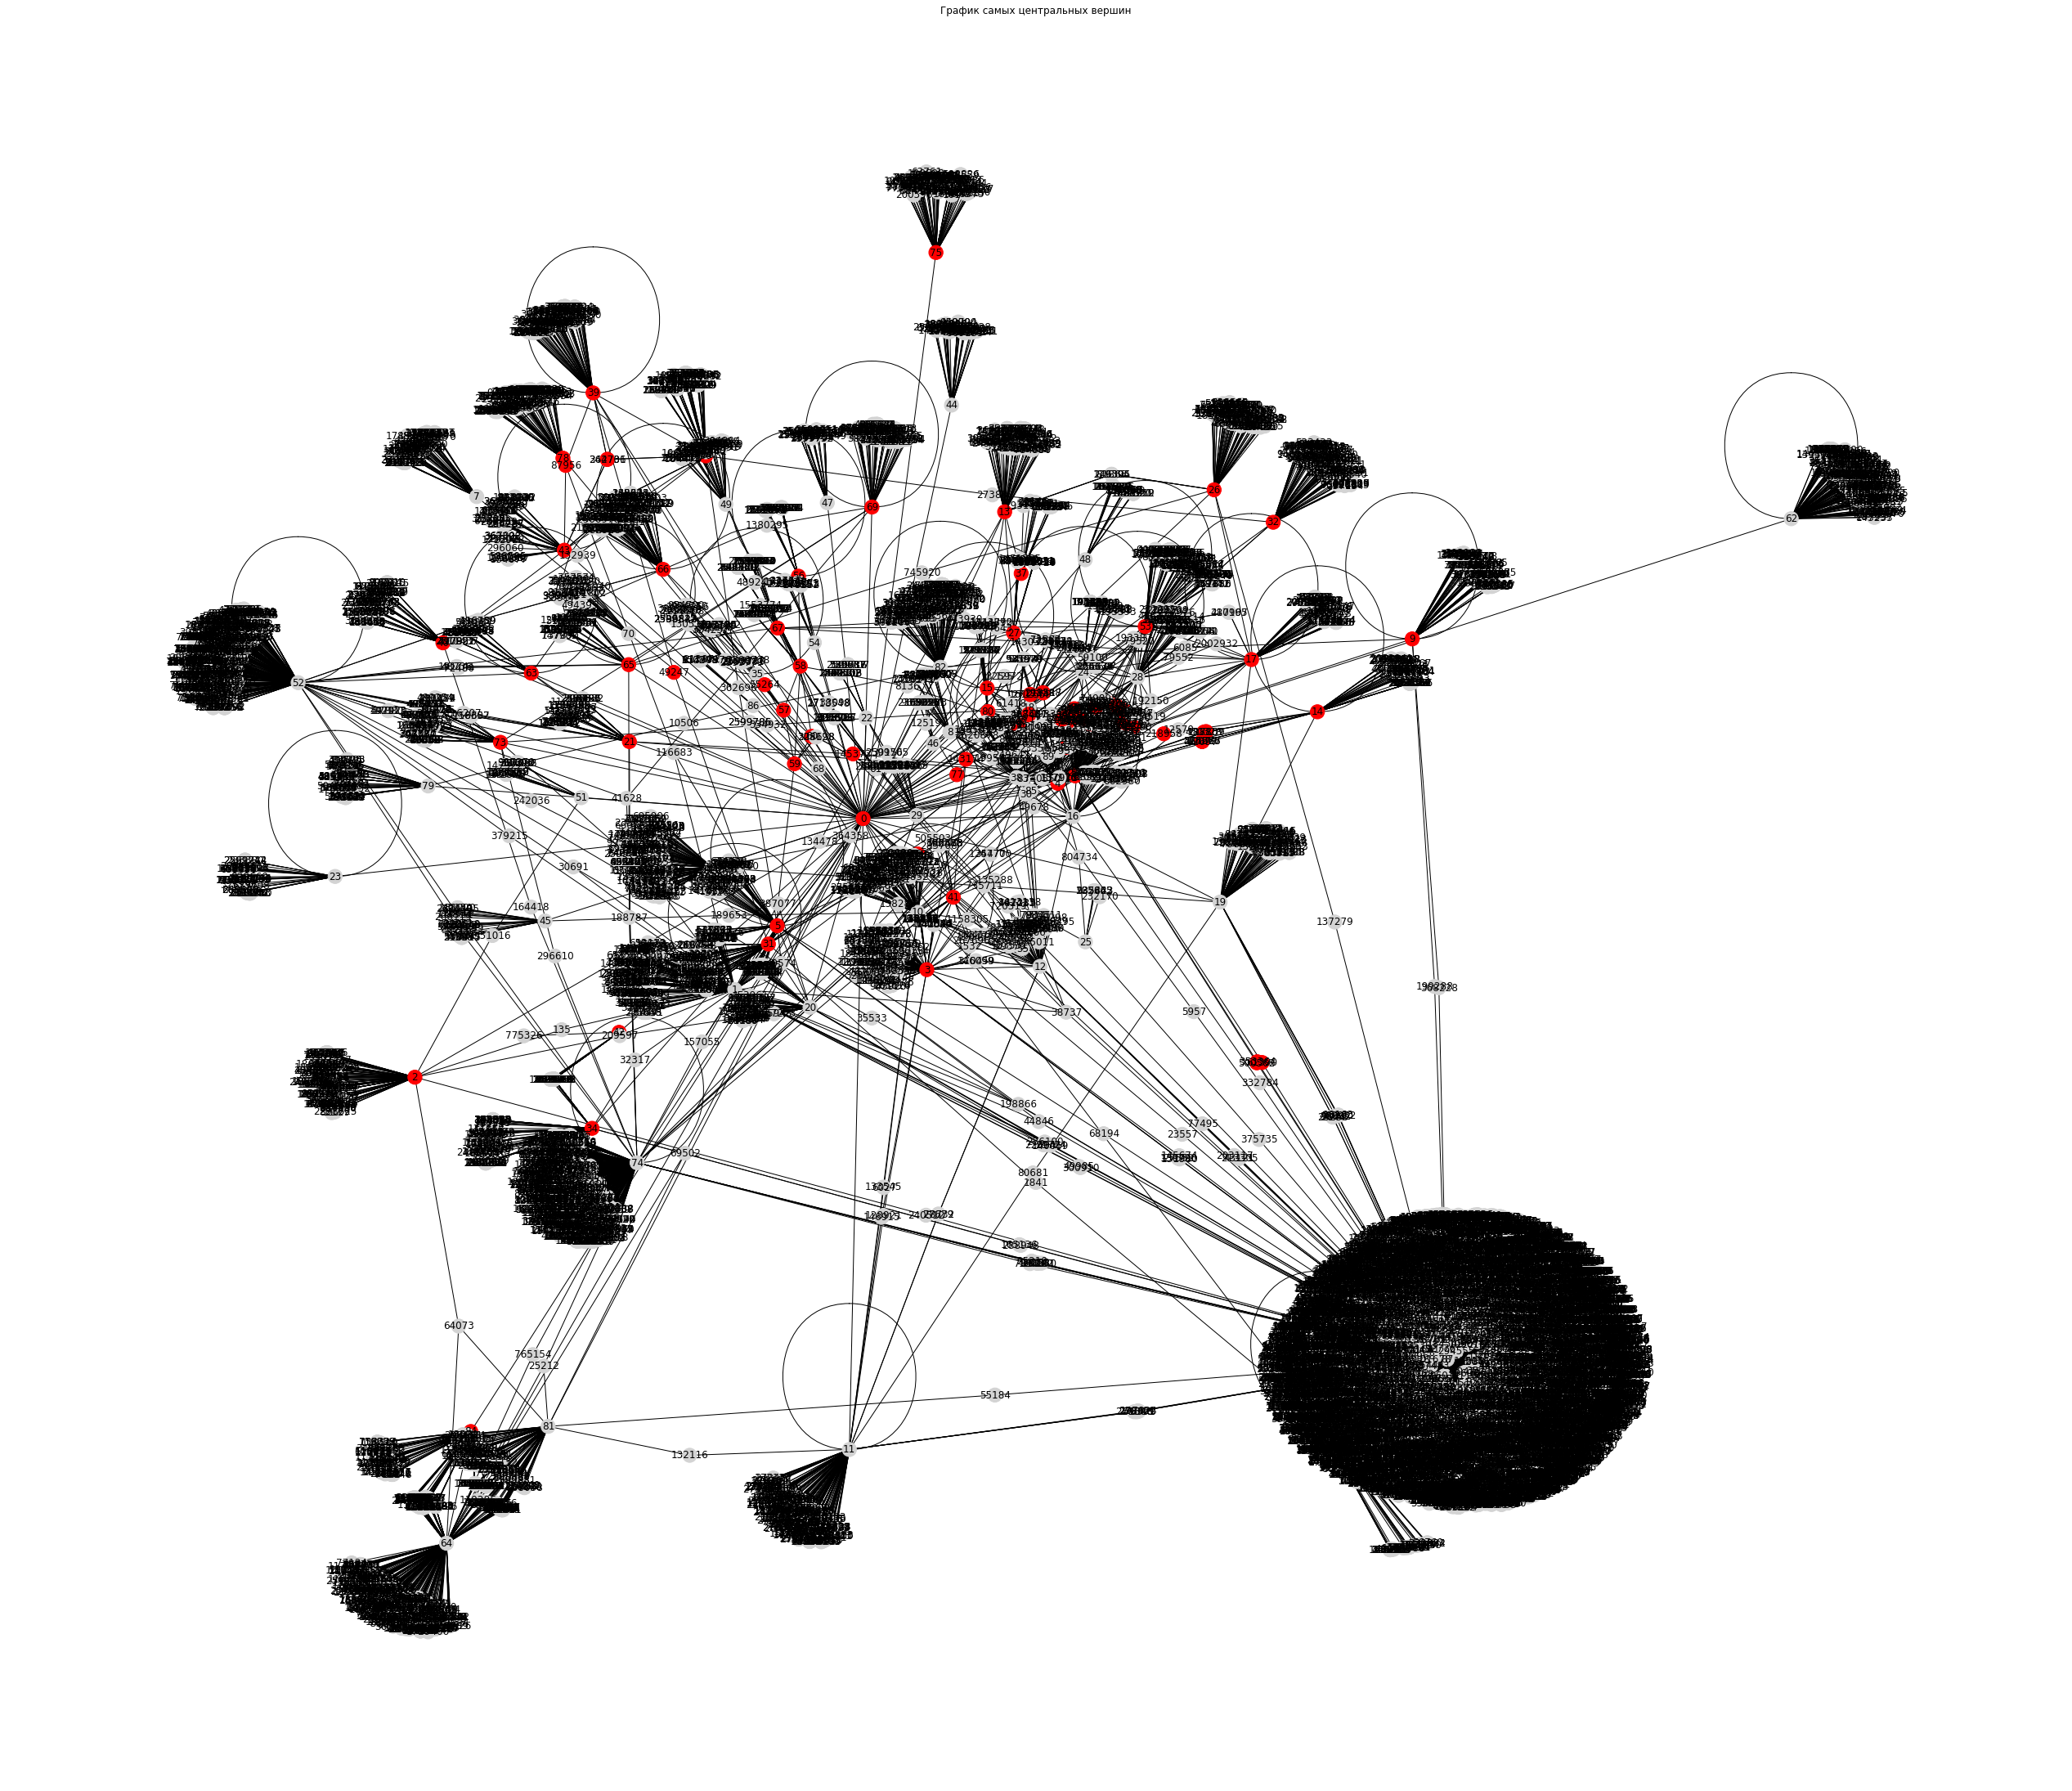

In [ ]:
plt.figure(figsize=(35, 30))
node_colors = ['red' if node in centr_nodes else 'lightgray' for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)
plt.title('График самых центральных вершин')
plt.savefig('График_центральных_вершин_katz.png')
plt.show()

# Вывод по первой части

# Выделения сообществ и вычисление модулярности

1 Асинхронный алгоритм распространения меток

In [ ]:
communities = asyn_lpa_communities(G)

In [ ]:
node_colors = []
cols = list(colors.cnames)
l = len(node_groups)
for node in G.nodes():
  if node in centr_nodes:
      node_colors.append('red')
  else:
    for i in range(l):
      if node in node_groups[i]:
        node_colors.append(cols[i])

In [ ]:
# pos = nx.spring_layout(G)
plt.figure(figsize=(35, 30))
nx.draw(G, node_color=node_colors, with_labels=True)
plt.title('Асинхронный алгоритм')
plt.savefig('Асинхронный_алгоритм.png')
plt.show()

In [ ]:
# модулярность
nx_comm.modularity(G, asyn_lpa_communities(G))

0.6765689955638636

2 Алгоритм Лёвена

In [ ]:
communities = louvain.best_partition(G)

In [ ]:
coms = list(communities.values())
nodes = list(G.nodes())
cols = list(colors.cnames)
l = len(nodes)

node_colors = []
for i in range(l):
  if nodes[i] in centr_nodes:
    node_colors.append('red')
  else:
    node_colors.append(cols[coms[i]])

coms=[]
nodes=[]

In [ ]:
# pos = nx.spring_layout(G)
plt.figure(figsize=(35, 30))
nx.draw(G, node_color=node_colors, with_labels=True)
plt.title('Алгоритм Лёвена')
plt.savefig('Алгоритм_Лёвена.png')
plt.show()

In [ ]:
# модулярность
louvain.modularity(communities, G)

0.7209907396388865

# Моделирование распространение эпидемии

Узлы с высокими значениями

In [ ]:
filename = "soc-LiveJournal1.txt"
fileHandler = open (filename, "r")
listOfLines = fileHandler.readlines()
listOfLines = listOfLines[4:]
fileHandler.close()

In [ ]:
G = nx.Graph()
i=0
for line in listOfLines:

  node1 = line.rsplit()[0]
  node2 = line.rsplit()[1]
  
  if node1 not in G.nodes():
    G.add_node(int(node1))
    #  print(node1)

  if node2 not in G.nodes():
    G.add_node(int(node2))

  G.add_edge(*(int(node1), int(node2)))

  i+=1

  if(i>10000):
    break

listOfLines = []

In [ ]:
initial_infections = centr_nodes

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4291e266d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f4287539a90>])

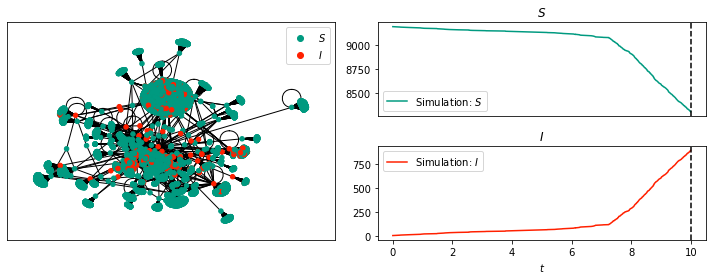

In [ ]:
initial_infections = centr_nodes
tmax = 10 # время течения процесса распространения инфекции
tau = 0.05 # "заразность" инфекционного процесса
gamma = 0.001 # вероятность выздоровления узла сети в следующий момент времени

sim = EoN.fast_SIS(G, tau, gamma, initial_infecteds = initial_infections,
               return_full_data=True, tmax = tmax)

sim.display(tmax, node_size = 20)

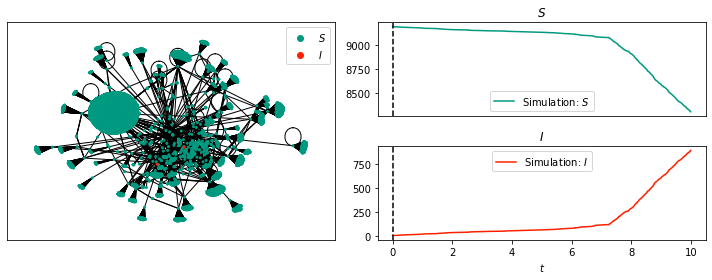

In [ ]:
ani=sim.animate(ts_plots=[['S'], ['I']], node_size = 20)
ani.save('fast_SIS_max.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

Узлы с низкими значениями

In [ ]:
# for k, v in sorted_tuples[-100:]:
#     centr_nodes.append(k)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9683feb590>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f968410ad50>])

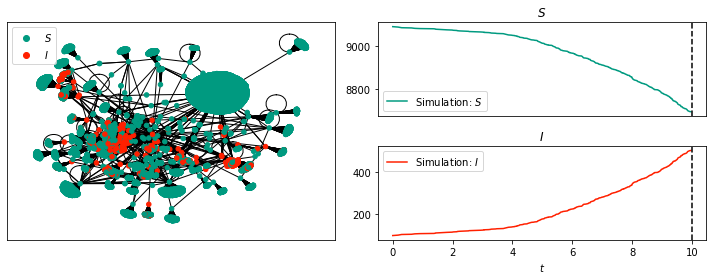

In [ ]:
initial_infections = rev_centr_nodes
tmax = 10 # время течения процесса распространения инфекции
tau = 0.05 # "заразность" инфекционного процесса
gamma = 0.001 # вероятность выздоровления узла сети в следующий момент времени

sim = EoN.fast_SIS(G, tau, gamma, initial_infecteds = initial_infections,
               return_full_data=True, tmax = tmax)

sim.display(tmax, node_size = 20)

In [ ]:
ani=sim.animate(ts_plots=[['S'], ['I']], node_size = 20)
ani.save('fast_SIS_min.mp4', fps=5, extra_args=['-vcodec', 'libx264'])